# Population Density

This notebooks demonstrates how we can compute population density at the county level.

We do this by using both `with_geometry=True` and `with_geometry_columns=True` so that
we get the shape of every county and also additional details like the land and water
area of the county. We use the population and the land area to compute the population
density.

In [1]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.datasets import ACS5
from censusdis.states import NY

In [2]:
# The ACS5 variable representing total population.
TOTAL_POPULATION_VARIABLE = "B01003_001E"

## County Level

In [3]:
gdf_counties = ced.download(
    ACS5,
    2022,
    ["NAME", TOTAL_POPULATION_VARIABLE],
    state=NY,
    county="*",
    with_geometry=True,
    with_geometry_columns=True,
)

In [4]:
gdf_counties

,STATE,COUNTY,NAME,B01003_001E,COUNTYNS,AFFGEOID,GEOID,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,YEAR,geometry
0,36,001,"Albany County, New York",315041,00974099,0500000US36001,36001,Albany County,NY,New York,06,1354273421,26971925,2022,"POLYGON ((-74.26473 42.42013, -74.25602 42.437..."
1,36,003,"Allegany County, New York",47222,00974100,0500000US36003,36003,Allegany County,NY,New York,06,2666225086,12989848,2022,"POLYGON ((-78.30932 42.23168, -78.30914 42.238..."
2,36,005,"Bronx County, New York",1443229,00974101,0500000US36005,36005,Bronx County,NY,New York,06,109235674,39353304,2022,"MULTIPOLYGON (((-73.77242 40.85954, -73.7705 4..."
3,36,007,"Broome County, New York",198365,00974102,0500000US36007,36007,Broome County,NY,New York,06,1827626589,25078245,2022,"POLYGON ((-76.13018 42.41034, -76.12564 42.410..."
4,36,009,"Cattaraugus County, New York",77000,00974103,0500000US36009,36009,Cattaraugus County,NY,New York,06,3388125876,36783591,2022,"POLYGON ((-79.05908 42.08672, -79.05908 42.086..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,36,115,"Washington County, New York",61310,00974155,0500000US36115,36115,Washington County,NY,New York,06,2152773115,38123568,2022,"POLYGON ((-73.63622 43.49824, -73.63453 43.498..."
58,36,117,"Wayne County, New York",91324,00974156,0500000US36117,36117,Wayne County,NY,New York,06,1563913376,2018184723,2022,"POLYGON ((-77.37605 43.27622, -77.36895 43.277..."
59,36,119,"Westchester County, New York",997904,00974157,0500000US36119,36119,Westchester County,NY,New York,06,1115811940,179391718,2022,"MULTIPOLYGON (((-73.77237 40.88479, -73.77146 ..."
60,36,121,"Wyoming County, New York",40338,00974158,0500000US36121,36121,Wyoming County,NY,New York,06,1535219438,9158067,2022,"POLYGON ((-78.48812 42.78157, -78.48795 42.788..."


In [5]:
# Area in the ALAND column is is square meters. If we want population per square mile we
# have to scale it. 1609.34 is the number of meters per mile.

METERS_PER_MILE = 1609.34

gdf_counties["POPULATION_DENSITY"] = gdf_counties[TOTAL_POPULATION_VARIABLE] / (
    gdf_counties["ALAND"] / (METERS_PER_MILE * METERS_PER_MILE)
)

In [6]:
# Most densely populated counties:
gdf_counties[["NAME", TOTAL_POPULATION_VARIABLE, "POPULATION_DENSITY"]].nlargest(
    5, "POPULATION_DENSITY"
)

,NAME,B01003_001E,POPULATION_DENSITY
30,"New York County, New York",1645867,72639.279664
23,"Kings County, New York",2679620,38624.088660
2,"Bronx County, New York",1443229,34218.925305
40,"Queens County, New York",2360826,21713.814333
42,"Richmond County, New York",492925,8569.207797


### Plot the population density

Notice that NYC is where the density lies at the county level.

Text(0.5, 1.0, 'Population Density')

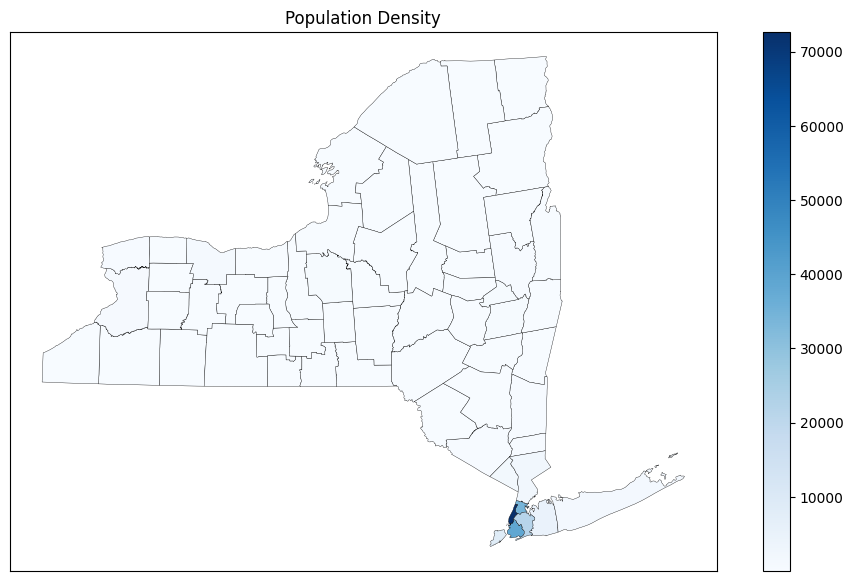

In [7]:
ax = cem.plot_map(
    gdf_counties,
    "POPULATION_DENSITY",
    cmap="Blues",
    edgecolor="black",
    figsize=(12, 7),
    linewidth=0.25,
    legend=True,
)

ax.set_title("Population Density")